## 【課題】タイタニック生存予測　ランダムフォレスト

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## データ取得・読み込み

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## sample

In [3]:
data_train.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C


## 前処理について記述せよ
以下の観点をすべて含めて記述しましょう。

・前処理とは何か  
・なぜ前処理を行う必要があるのか  
・前処理は具体的に何を行うか(3つ以上記述せよ)  
・前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)

答え：  
・前処理とは、コンピュータが機械学習できるようにデータを加工処理すること。  
・現実のデータは、空白（欠損値）や文字列や外れ値が入っていたりするため、コンピュータが数字で計算できるように、穴を埋めてあげたり文字を数字に置き換えたり誤ったデータを削除したりしなければならないから。　  
・欠損値の削除・補完、文字列の数値変換、外れ値の検出と削除・置換  
・欠損値の削除・補完は、欠損値による作業効率の低下（エラー）やデータ分析作業やデータ加工作業の複雑化や結果にバイアスが生じることの防止。文字列の数値変換は、文字列による作業効率の低下（エラー）やデータ分析作業やデータ加工作業の複雑化防止。外れ値による分析結果の歪みやモデルの過学習防止。

## 2/前処理について記述せよ
前処理について記述せよの調査により、データを確認する際にどのような点を見るとよいか、3つ以上記述せよ。

答え：  
・各カラムの欠損値の有無及び頻度  
・文字列カラムの有無と内容  
・突出した値の有無及び頻度

## 前処理を行う

In [4]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [5]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


## 前処理の内容について記述せよ
以下の観点をすべて含めて記述しましょう。

simplify_ages  
simplify_cabins  
simplify_fares  
format_name  
drop_features  
encode_features  
・以上のメソッドがそれぞれ何を行っているか記述せよ  
・それぞれなぜそのようなことを行っているか記述せよ(それによって得られるメリットまで考察すること)


答え：  
simplify_ages:欠損値を補充してカテゴライズ、欠損値を補充した部分はUnknownに分類。  
年齢をカテゴライズすることでSurvivedとの関連性を把握しやすくするため、但し補充値に平均や中央値を入れてをそのまま使うと分析結果に歪みが出ることに配慮したもの。  
simplify_cabins：欠損値に’N’を補充して、cabinsの等級（複数あるものは１つ）だけ残して番号を落とす（カテゴライズ）。  
カテゴライズすることでSurvivedとの関連性を把握しやすくするため、但し補充値に平均や中央値を入れてをそのまま使うと分析結果に歪みが出ることに配慮したもの。  
simplify_fares:欠損値を補充してカテゴライズ、欠損値を補充した部分はUnknownに分類。  
カテゴライズすることでSurvivedとの関連性を把握しやすくするため、但し補充値に平均や中央値を入れてをそのまま使うと分析結果に歪みが出ることに配慮したもの。  
format_name:nameを分割してラストネームと冠称に分ける。  
Survivedと関係なさそうなname特徴量から関連性の有りそうな冠称部分を取り出して関連性を把握しやすくするため。  
drop_features：関連性の薄い特徴量や不要になった特徴量を落とす。  
精度を上げるため。  
encode_features：カテゴリカルな特徴量を数値化。  
関連性のあるカテゴリカルな特徴量を分類器にかけられるようにするため。

## モデル選択について記述せよ
今回使用するモデルは決定していますが、モデル選択をする際の演習を行いましょう。  
・今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。  
・その手法の概要をそれぞれ記述せよ  
・その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ

答え：  
ロジスティック回帰：2択の予測においてロジスティック曲線を使用して片方になる確率を0から1の値で算出する。回帰によって分類する手法。  
長所は、訓練・予測が特に高速、特徴量の重要性・効果を説明し易い、多クラス分類にも対応、サンプル数が多くても少なくても性能を発揮。  
短所は、精度が相対的に低い（特に低次元空間？）、精度が正則化パラメーターの調整に大きく左右される、係数の値の定や意味の理解が難しい。  
サポートベクターマシーン(SVM)：データを分類するための境界線を決定する際に、境界線から一番近いサンプルデータまでのマージンの和が最大になる線を境界線とする手法。マージン最大化を取り入れることで少ないデータでも汎化性能が高い2分類回帰モデル。  
長所は、訓練・予測が高速、特徴量の重要性・効果を説明し易い、サンプル数が多くても少なくても性能を発揮（大きい特徴セットに好適）。  
短所は、精度が相対的に低い（特に低次元空間？）、２クラス分類のみに、対応精度が正則化パラメーターの調整に大きく左右される、係数の値の定や意味の理解が難しいこと。  
決定木：木構造のモデルによって分類する手法。上から１つの説明変数とその閾値によってデータを２つに分け、さらに枝先で同様に別基準でデータを分けることによって、分類するモデル。  
長所は、モデルが容易に可視化及び理解可能、データスケールに対して完全に不変（正規化や標準化の必要なし）、訓練・予測時間が比較的高速。  
短所は、過剰適合しやすく汎化性能が低い、外挿ができないこと。  
ランダムフォレスト：決定木を大量に生成し、各決定木の結果を集計して予測する手法。各決定木は独立しており、説明変数からのサンプリングまたは学習データからのサンプリングによって、異なる特性を持つように学習する。  
長所は、非常に精度が高い、汎化性能も高い、特徴量の重要性・効果を説明し易い、パラメーターのチューニングがあまりいらいない、データのスケール変換不要。  
短所は、予測過程の説明が決定木より可視化困難、多くのメモリ消費、訓練や予測に時間がかかる（但し、複数のCPUコアで簡単に並列可）、高次元で疎なデータに対してはうまく機能しないこと。  
勾配ブースティング木：決定木を大量に生成し、各決定木の結果を集計して予測する手法。決定木を逐次的に増やしていき、生成済みの決定木が間違えてしまうケースのラベルを更新して、新たな決定木を生成していくイメージ。  
長所は、非常に精度が高い、汎化性能も高い、特徴量のスケール変換の必要なし。  
短所は、パラメータのチューニングに最新の注意が必要、訓練にかかる時間が長い、高次元の疎なデータに対してはうまく機能しないこと。

## モデル選択の基準
下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること(他の参考資料でも構わない、その場合参考資料を明記すること)

答え：
精度、トレーニング時間、線形性、パラメーターの数、特徴の数

## モデル選択におけるデータ可視化

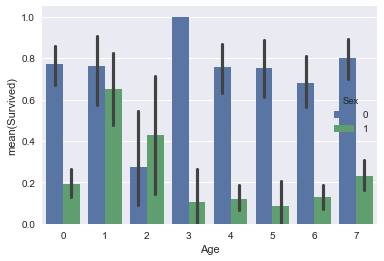

In [6]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

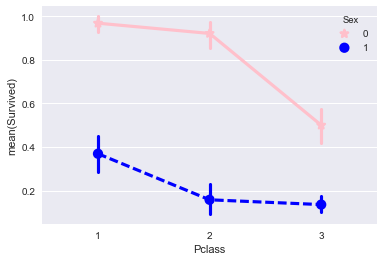

In [7]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## データの可視化の結果について考察せよ
・上記の２つの可視化から分かったことについて考察せよ。  
・上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか

答え：  
女性は男性に比べて生存率が高い、男性であっても幼児や子供は生存率が高い、女性は子供だけ生存率が低い（？）、Pclassが１の人は生存率が高く３の人は生存率が低くなる、Pclass2の場合、女性であれば（１に近い）高い生存率だが男性だと（３に近い）低い生存率となる。  
線形分類には馴染みにくそう。

## データセットの分割

In [8]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,)

## ランダムフォレストについて記述せよ  
以下の観点をすべて含めて記述しましょう。  
・決定木とはどのような手法か  
・ランダムフォレストとはどのような手法か  
・ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。  
・今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ  

答え：  
決定木：木構造のモデルによって分類する手法。上から１つの説明変数とその閾値によってデータを２つに分け、さらに枝先で同様に別基準でデータを分けることによって、分類するモデル。  
ランダムフォレスト：決定木を大量に生成し、各決定木の結果を集計して予測する手法。各決定木は独立しており、説明変数からのサンプリングまたは学習データからのサンプリングによって、異なる特性を持つように学習する。  
長所は、非常に精度が高い、汎化性能も高い、特徴量の重要性・効果を説明し易い、パラメーターのチューニングがあまりいらいない、データのスケール変換不要。  
短所は、予測過程の説明が決定木よりは可視化困難、多くのメモリ消費、訓練や予測に時間がかかる（但し、複数のCPUコアで簡単に並列可）、高次元で疎なデータに対してはうまく機能しないこと。  
ランダムフォレストの手法が適する理由としては、データ可視化による分析結果からすると線形分類には馴染みにくそうであること、決定木と比べて精度及び汎化性能が高いこと

## 学習

In [9]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.97191011236
0.787709497207


## 精度を高める

In [10]:
clf = RandomForestClassifier(max_depth=3,criterion='entropy',random_state=0).fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.818820224719
0.826815642458


## ハイパーパラメータについて  
・ハイパーパラメーターとは何か  
・ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ  
・記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）

答え：  
ハイパーパラメータとは、事前確率を決めるパラメータや確率モデル全体に影響を与えるパラメータのことで、ハイパーパラメータを決定（調整）することによって確率モデルの精度や汎化能力が決定（左右）する。  
ランダムフォレストの代表的なハイパーパラメーターは、  
n_estimators:整数を指定．デフォルトの値は10．バギングに用いる決定木の個数を指定．
criterion:文字列を指定．デフォルトは gini．その他に entropy を指定できる．決定木はこの指標を基準にデータを分割する．  
max_features:整数，小数，文字列または None を指定．デフォルトは None．最適な分割をするために考慮するフィーチャーの数を指定．整数を指定した場合，その個数，小数の場合全フィーチャーに対する割合個，auto を指定した場合，フィーチャー数のルート個，log2 を指定した場合，log2(フィーチャー数) 個．    
max_depth:整数または None を指定．決定木の深さの最大値を指定．過学習を避けるためにはこれを調節するのが最も重要．

## 検証について記述せよ  
・検証は何か  
・なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)  
・主な検証方法について2つ以上記述せよ

回答：  
検証とは機械学習モデルの有効性を確認する工程で、UnderFittingやOverFitting（特にOverFitting）が起こっていないかを確認してモデルに汎用性があるか判明させるために必要。  
検証方法としては、ホールドアウト方、K分割交差検証などがある。

## KFoldについて記述せよ  
・K-分割交差検証について説明せよ  
・K-分割交差検証はデータセットを何個に分割するか  
・データセットを分割する際、その個数はどのように考えると良いか  
・K-分割交差検証は何回の検証を行うか  
・K-分割交差検証の結果は、最終的にどのように求められるか

回答：  
K-分割交差検証とは、正解付きのデータをK分割して，そのうち1つをテストデータに，残りのK-1個を訓練データとして学習と精度の評価を行い、これをK個のデータのかたまりに渡って順に，つまり学習と評価をK回行って，その結果を平均したものを「未知のデータへの対応能力」とする方法です。  
k の値は大きければ大きいほど、正確にモデルを評価できます。サンプル数に対して k が小さすぎると、正答率の誤差が大きくなります（k の最大値はサンプル数ですので、「k = サンプル数」とした場合が最も正確な評価だと言えます）。しかし、k が大きければそれだけ実行に時間がかかるので、k は正答率の誤差が大きくならない範囲でなるべく小さい値にしなければなりません（http://d.hatena.ne.jp/hoxo_m/20110618/p1　ではk = (1 + log(n)/log(2)) * 4が減少率の境目かなーと書かれていました）。

## KFoldの実施・結果確認

In [11]:
from sklearn.model_selection import KFold

scores=0
kf = KFold(n_splits=3,shuffle=True)
for train, test in kf.split(X):
#     print(train,test)
#  X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
    clf = RandomForestClassifier(max_depth=3,criterion='entropy',random_state=0).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(score)
    scores += score
scores/3

0.826815642458
0.826815642458
0.826815642458


0.82681564245810046

## チューニング&検証

In [12]:
# 必要なライブラリのインポート
from sklearn.grid_search import GridSearchCV
# 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
params = {  'n_estimators': [4, 6, 9],
            'max_features': ['log2', 'sqrt','auto'],
            'criterion': ['entropy', 'gini'],
            'max_depth': [2, 3, 5, 10],
            'min_samples_split': [2, 3, 5],
            'min_samples_leaf': [1,5,8]
         }

# モデルにインスタンス生成
mod = RandomForestClassifier()

# ハイパーパラメータ探索
cv = GridSearchCV(estimator = mod, param_grid = params, cv = 10, scoring= 'accuracy', n_jobs = -1)
cv.fit(X_train, y_train)

/Users/noritakeriu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/noritakeriu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [13]:
cv.grid_scores_

[mean: 0.78371, std: 0.04547, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4},
 mean: 0.80197, std: 0.04732, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6},
 mean: 0.79635, std: 0.04362, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9},
 mean: 0.78090, std: 0.04563, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 4},
 mean: 0.78792, std: 0.05533, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6},
 mean: 0.81039, std: 0.04136, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 

In [14]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 4}

## どの特徴量が重要であったかを調査する

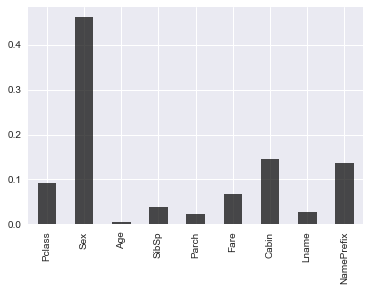

In [15]:
clf.feature_importances_
data = pd.Series(clf.feature_importances_, index=list(X.columns[:9]))
data.plot(kind='bar', color = 'k', alpha=0.7)